In [1]:
import pandas as pd

import divvy

In [5]:
df = divvy.stations_feed.get_data()
df.head()

,altitude,availableBikes,availableDocks,city,id,is_renting,kioskType,landMark,lastCommunicationTime,latitude,...,postalCode,stAddress1,stAddress2,stationName,status,statusKey,statusValue,testStation,totalDocks,executionTime
0,,19,20,Chicago,2,True,K3_FULL,15541,2019-02-04 18:22:28,41.876470,...,60605,Buckingham Fountain,,Buckingham Fountain,IN_SERVICE,1,In Service,False,39,2019-02-04 18:25:34
1,,5,50,Chicago,3,True,K3_FULL,15544,2019-02-04 18:25:32,41.867226,...,,Shedd Aquarium,,Shedd Aquarium,IN_SERVICE,1,In Service,False,55,2019-02-04 18:25:34
2,,10,13,Chicago,4,True,K3_FULL,15545,2019-02-04 18:25:33,41.856268,...,,Burnham Harbor,,Burnham Harbor,IN_SERVICE,1,In Service,False,23,2019-02-04 18:25:34
3,,14,9,Chicago,5,True,K3_FULL,13030,2019-02-04 18:24:58,41.874053,...,60605,State St & Harrison St,,State St & Harrison St,IN_SERVICE,1,In Service,False,23,2019-02-04 18:25:34
4,,18,20,Chicago,6,True,K3_FULL,15548,2019-02-04 18:24:12,41.886976,...,60601,Dusable Harbor,,Dusable Harbor,IN_SERVICE,1,In Service,False,39,2019-02-04 18:25:34


In [ ]:
# df = divvy.historical_data.get_stations(
#     year=[str(_) for _ in range(2013,2019)]
# )
# df.to_pickle('stations.pkl')

# df = divvy.historical_data.get_rides(year=['2016', '2017', '2018'])
# df = df.sort_values('start_time')
# df['tripduration'] = df['tripduration'].str.replace(',', '').astype(float)
# df.to_pickle('data/data_2016-2018.pkl')

In [6]:
df = pd.read_pickle('data/data_2016-2018.pkl')

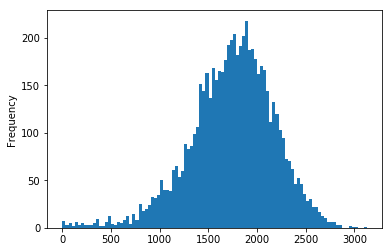

In [13]:
# How many times has each bike been ridden?
df['bikeid'].value_counts().plot.hist(bins=100);

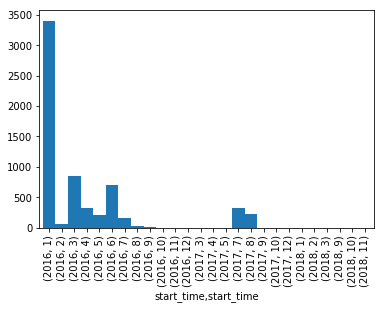

In [20]:
# Count of first month bike used
color=(31/256,119/256,180/256,1)

frst_use = df.groupby('bikeid')['start_time'].first()

(frst_use.groupby([frst_use.dt.year, frst_use.dt.month])
         .count()
         .reindex()
         .plot.bar(color=color, width=1));

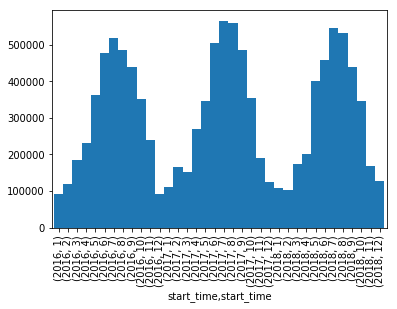

In [23]:
# Count of monthly rides
(df['start_time'].groupby([df['start_time'].dt.year, df['start_time'].dt.month])
                 .count()
                 .plot.bar(color=color, width=1));

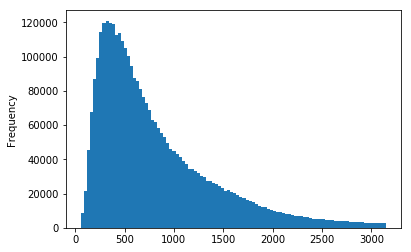

In [10]:
# How long are trips?
plt = (df.tripduration.loc[df.tripduration < df.tripduration.quantile(.95)]
                      .plot.hist(bins=100));

## Get Station Coordinates

In [20]:
connections = (df.groupby(['from_station_id','to_station_id'])
                 .agg({'trip_id':'count'}))

In [36]:
# Using google maps, I would have to filter to routes that have >35 
# rides in order for it to be free-ish
cutoff = 35
(len(connections.loc[connections['trip_id'] > cutoff]) - 40000) * 0.005 #cents/query

2.57

https://developers.google.com/maps/documentation/directions/start

https://developers.google.com/maps/billing/understanding-cost-of-use#directions

https://developers.google.com/maps/documentation/directions/intro#TravelModes